과제. Pandas 연습문제 풀이 

마지막 참고사항. 
붗꽃 데이터는 분류모델로 자주 쓰여. setosa, versicolor, virginica 3개종을 잘 예측할 수록 분류모델 성능 업.
이상치 제거는 분류모델의 성능을 향상시키기 위해 하는 것이기에 . 
종별로 이상치를 제거하여. discibe()를 답으로 보여주기엔 어색하다. 
종을 구분하지 않고. iris 데이터프레임에서 직접 이상치를 제거하고, (4개의 컬럼이 될것) 통계요약을 보여줘야 분류모델의 성능을 향상시키는데 
쓸모가 있을것이다.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 1. 아이리스 데이터 
     - a. 종별로 기초통계량 구하기 descirbe()
     - b. outlier 제거하고 통계량 구하기

In [2]:
#iris 데려오려고 씨본 임포트
# 사이킷런의 iris.keys() 로 나오는 데이터와는 차이가 있다. 애초에 사이킷런의 데이터셋은 df가 아니기도 하고.
iris = sns.load_dataset('iris')
# iris.head(3)
iris.species.unique()
# iris.target
# iris.keys()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

* class_setosa

In [3]:
# a 종별로 기초통계량 구하기  # 'setosa', 'versicolor', 'virginica'
# iris.describe()
# iris[iris.species == 'setosa']

class_setosa = iris[iris.species == 'setosa'].describe()       # class = setosa
class_setosa.style.set_caption('class : SETOSA')

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.006000,3.428000,1.462000,0.246000
std,0.352490,0.379064,0.173664,0.105386
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.675000,1.575000,0.300000
max,5.800000,4.400000,1.900000,0.600000


* class_versicolor

In [ ]:
class_versicolor = iris[iris.species == 'versicolor'].describe()  
class_versicolor.style.set_caption('class : VERSICOLOR')

* class_virginica

In [ ]:
class_virginica = iris[iris.species == 'virginica'].describe()  
class_virginica.style.set_caption('class : VIRGINICA')

     - b. 3분위수(Q3)와 1분위수(Q1)의 차이보다 1.5배가 크거나 작은 데이터는 이상치이다. 
     
     즉, Q1 - 1.5 * (Q3 - Q1) 보다 작은 데이터 , Q3 + 1.5 * (Q3 - Q1) 보다 큰 데이터

     이 이상치를 제거하고 위의 4가지 항목에 대해서 평균, 표준편차를 구하시오.


    sol ) 최종적으로는 이상치 NaN 처리를 이용해서 문제를 해결할것.
    cf. 
    # 이상치 nan처리 예시 (x는 setosa.sepal_length , setosa.sepal_width, setosa.petal_length, setosa.petal_width 등)
        x.values[x < Q1 - 1.5*iqr] = np.NaN
        x.values[x > Q3 + 1.5*iqr] = np.NaN

In [6]:
# 이상치와 박스플롯에 대해 이해하고 있다면, (사분위수, 혹은 IQR)
# 곧바로 코드작성해서 문제없으나, 일단 이상치가 있는지 없는지 라도 확인해 보고자 한다. 
# 그림에서 o 로 표시된 데이터가, 최대값 or 최솟값을 벗어난 outlier이다. 처리방법 고민하자.

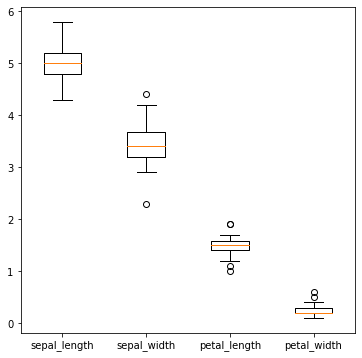

In [7]:
import matplotlib.pyplot as plt 

setosa = iris[iris.species == 'setosa'].iloc[:, : -1]
plt.figure(figsize=(6,6))
plt.boxplot(setosa, labels=class_setosa.columns)   # x축에 class_setosa 컬럼이름 표기하고자.
plt.show()

# setosa 각 컬럼의 이상치는 0, 2, 3, 2 개로 예상이 된다.

setosa.sepal_width 시리즈부터 이상치 제거 

sepal_length 는 이상치 없을것으로 보여서  테스트 위해 2번째 sepal_width 컬럼부터 

cf. 각 컬럼의 이상치를 제거했을때 , 컬럼별 50개인 데이터의 수가 각각 달라질 것이기에 .discribe()를 사용못할것으로 예상.
에러없이 돌아간다고 하더라고, 0값, 혹은 nan,null등의 값 때문에 평균 및 표준편차 계산 틀어질 것으로 기대.
그러므로 이상치 제거한 시리즈만 만들어두고 평균과 표준편차 구할 것.

결과는. NaN 값 때문에 요약통계량에 에러가 날것으로 생각됐는데, 알아서 제외하고 계산이 된다고 한다.

In [135]:
# setosa.head(3)
class_setosa    # 4분위수 서치 위해서 class_setosa 의 25%, 75% 값 이용할것. 

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [109]:
# 사분위수. np.percentile 이용
Q1 = np.percentile(setosa.sepal_length, 25)  # 1/4 분위수 1시그마라고 표현하려함. (맞는 표현 아니야.) 일사분위수 가 낳나?
Q3 = np.percentile(setosa.sepal_length, 75)  # 3/4 분위수
iqr = Q3 - Q1
print(Q1, Q3, iqr, np.dtype)
# 반복문 사용 고려해 인덱스로 outlier 확인 할수 있는 함수 정의해보기

4.8 5.2 0.40000000000000036 <class 'numpy.dtype'>


In [9]:
# 사분위수 setosa.sepal_width 의 인덱스 이용.
Q1 = class_setosa.iloc[4,1]   # 1/4 분위수  값은 25%값으로 3.2
Q3 = class_setosa.iloc[6,1]   # 3/4 분위수  값은 75%값으로 3.675
iqr = Q3 - Q1

print(Q1,Q3,iqr)

3.2 3.6750000000000003 0.4750000000000001


In [ ]:
# 이상치 확인 및 제거
# setosa.sepal_width[setosa.sepal_width < Q1 - 1.5*iqr] #최솟값 벗어난 이상치 #1개확인
# setosa.sepal_width[setosa.sepal_width > Q3 + 1.5*iqr] #최댓값 벗어난 이상치 #1개확인

setosa.sepal_width[(setosa.sepal_width >= Q1 - 1.5*iqr) & (setosa.sepal_width <= Q3 + 1.5*iqr)]
# 위는 이상치 제거된 세팔윗스 시리즈. >=, <= 등 부등호 달라진 것 확인, 48개 데이터 기대함.

In [12]:
# 이상치 제거 후 시리즈 반환 및 agg 이용. mean. std, count 구함
# 반환된 값은 pandas.core.series.Series 형태. 즉 시리즈.
type(setosa.sepal_width[(setosa.sepal_width >= Q1 - 1.5*iqr) & (setosa.sepal_width <= Q3 + 1.5*iqr)].agg(['mean','std','count']))

pandas.core.series.Series

In [13]:
setosa.sepal_width[(setosa.sepal_width >= Q1 - 1.5*iqr) & (setosa.sepal_width <= Q3 + 1.5*iqr)].agg(['mean','std','count'])

mean      3.431250
std       0.320343
count    48.000000
Name: sepal_width, dtype: float64

이상치 제거하는 버전 2 

sepal_width 컬럼 이상치2개 제거후(NaN값 채우기) mean, std 확인. 근데 이게 되네???

In [14]:
setosa.sepal_width.values[setosa.sepal_width < Q1 - 1.5*iqr] = np.NaN
setosa.sepal_width.values[setosa.sepal_width > Q3 + 1.5*iqr] = np.NaN
setosa.sepal_width.values

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , nan, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, nan, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [15]:
setosa.sepal_width.agg(['mean','std','count'])

mean      3.431250
std       0.320343
count    48.000000
Name: sepal_width, dtype: float64

In [16]:
small_vic = pd.DataFrame(setosa.sepal_width.agg(['mean','std','count']))
small_vic

,sepal_width
mean,3.431250
std,0.320343
count,48.000000


함수화 def

In [19]:
# 아웃라이어를 제거하는 함수. 교재 274p참고 파머완
def get_newstats(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    iqr = Q3 - Q1
    # 이상치 nan처리
    x.values[x < Q1 - 1.5*iqr] = np.NaN
    x.values[x > Q3 + 1.5*iqr] = np.NaN
    #일단 agg 시리즈 반환버전
    
    return x.agg(['mean','std','count'])
    

In [21]:
# setosa.sepal_length
get_newstats(setosa.sepal_length)

mean      5.00600
std       0.35249
count    50.00000
Name: sepal_length, dtype: float64

In [22]:
# setosa.sepal_width
get_newstats(setosa.sepal_width)

mean      3.431250
std       0.320343
count    48.000000
Name: sepal_width, dtype: float64

In [23]:
# setosa.petal_length
get_newstats(setosa.petal_length)

mean      1.460870
std       0.129062
count    46.000000
Name: petal_length, dtype: float64

In [25]:
# setosa.petal_width
get_newstats(setosa.petal_width)

mean      0.233333
std       0.085883
count    48.000000
Name: petal_width, dtype: float64

이상치 처리된. result 데이터프레임만들고, 요약통계 discribe()  후 . 원본요약통계치와 변화 있는지 비교

In [44]:
result = pd.DataFrame({ 
            'sepal_length': setosa.sepal_length, 
            'sepal_width' : setosa.sepal_width,
            'petal_length': setosa.petal_length, 
            'petal_width' : setosa.petal_width,            
            })
result.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
result.describe()
# 일단 값의 개수 차이가 있으니 당연히 차이가 있을것으로 기대되는데.

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,48.000000,46.000000,48.000000
mean,5.00600,3.431250,1.460870,0.233333
std,0.35249,0.320343,0.129062,0.085883
min,4.30000,2.900000,1.200000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.625000,1.500000,0.300000
max,5.80000,4.200000,1.700000,0.400000


In [48]:
class_setosa

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


이상치 처리된. 2, 3, 4 컬럼 요약통계량의 변화 확인 할 수 있다. 

cf. versicolor , virginica 종도 마찬가지 방법으로 구할 수 있다.

이상치 제거 함수까지는 만들었음에도. 3개의 종 (각 종마다 4개의 컬럼) 을 모두 처리하는 프로그램은 어떻게 구상해야 하는지 ..
숙제.

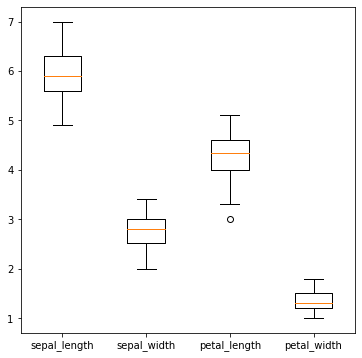

In [28]:
versicolor = iris[iris.species == 'versicolor'].iloc[:, : -1]
plt.figure(figsize=(6,6))
plt.boxplot(versicolor, labels=class_versicolor.columns)
plt.show()

# 꼿잎 길이에 이상치 1개 

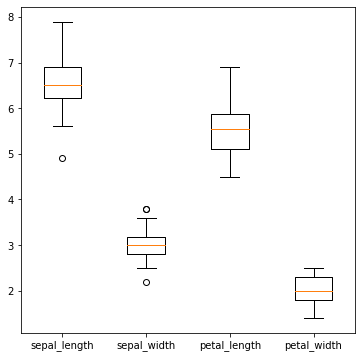

In [29]:
virginica = iris[iris.species == 'virginica'].iloc[:, : -1]
plt.figure(figsize=(6,6))
plt.boxplot(virginica, labels=class_virginica.columns)
plt.show()
# 컬럼1에 1개, 컬럼2에 2개